<a href="https://colab.research.google.com/github/ymei9/Seoul_bike_usage/blob/main/BA780_Team_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Future Bike Demand in Seoul

**By: Arpit Jain, Tingting Cao, Zhenyang Gai, Sihoon (Daniel) Yu, Yuxuan Mei**

---





Problem Definition and Data Source Description 

1. Project Objective 

Our goal is to use the Seoul Bike Rental database to predict future bike demand based on attributes such as seasons, the weather conditions, and the number of bikes rented per hour. The bikes are are rented out by app based companies such as Seoul Bike.

Currently rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bikes available and accessible to the public at the right time as it decreases the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. Managing the fleet of rental bikes is an important task for Seoul Bike



In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/arp-jain/BA780teamproject/main/SeoulBikeData%20(1).csv?token=AUXTM24L322ON3ZHND7UO6LBLB6DW",encoding='ISO-8859-1')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
from sklearn.model_selection import train_test_split
train_data = np.random()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


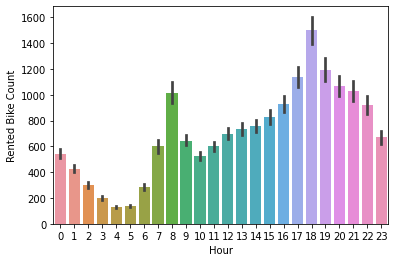

In [ ]:
import seaborn as sns 
sns.barplot('Hour','Rented Bike Count',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


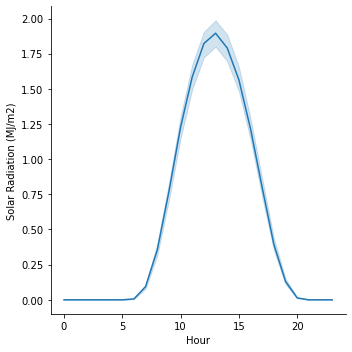

In [ ]:
sns.relplot('Hour','Solar Radiation (MJ/m2)',data=df,kind='line')

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


                           Rented Bike Count  ...  Snowfall (cm)
Rented Bike Count                   1.000000  ...      -0.141804
Hour                                0.410257  ...      -0.021516
Temperature(°C)                     0.538558  ...      -0.218405
Humidity(%)                        -0.199780  ...       0.108183
Wind speed (m/s)                    0.121108  ...      -0.003554
Visibility (10m)                    0.199280  ...      -0.121695
Dew point temperature(°C)           0.379788  ...      -0.150887
Solar Radiation (MJ/m2)             0.261837  ...      -0.072301
Rainfall(mm)                       -0.123074  ...       0.008500
Snowfall (cm)                      -0.141804  ...       1.000000

[10 rows x 10 columns]


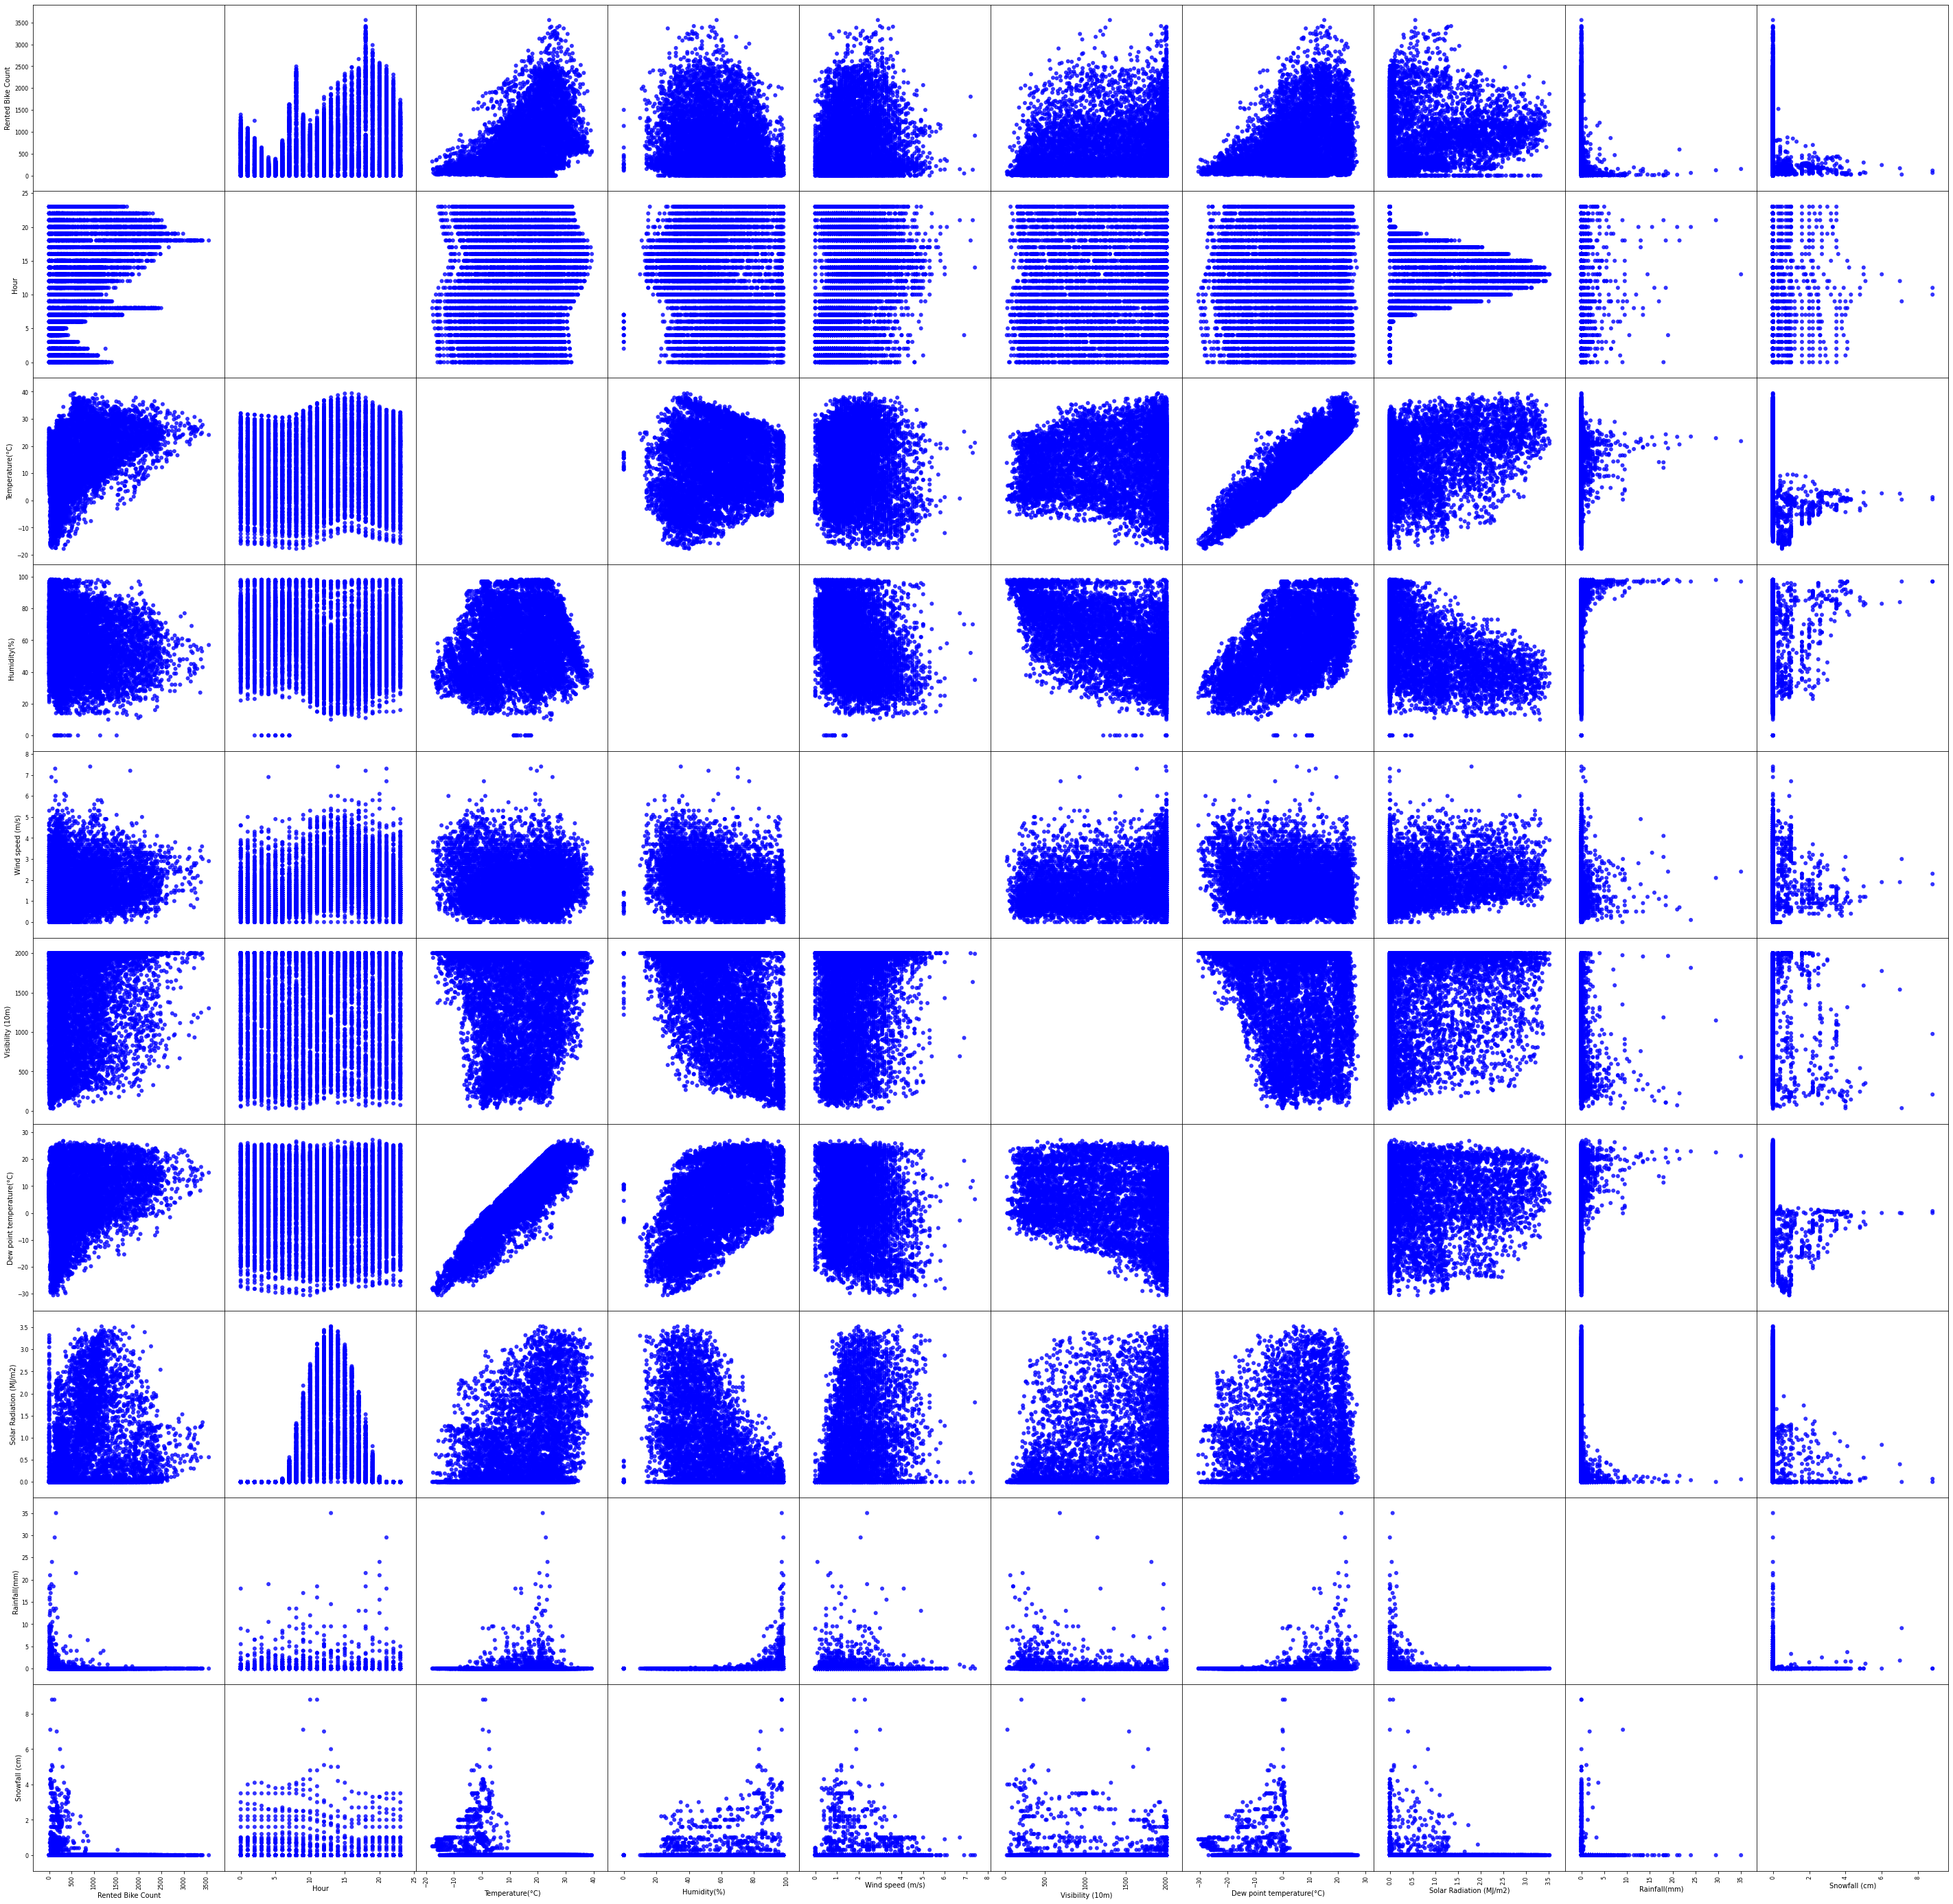

In [ ]:
print(df.corr())

fig = pd.plotting.scatter_matrix(df,figsize=(50,50),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  
plt.savefig('1.png',dpi=300)
plt.show()

In [ ]:
group = df.groupby("Seasons")
df.groupby("Seasons").agg({'Rented Bike Count':'sum'})

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


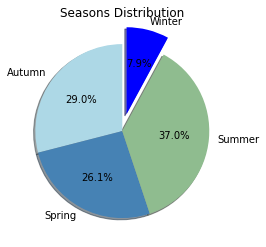

In [ ]:
audience = list(df.groupby("Seasons").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])

types = ['Autumn','Spring','Summer','Winter']



colors = ['lightblue','steelblue','darkseagreen','b']
plt.pie(audience,
       labels=types,  
       autopct='%1.1f%%', 
       colors=colors,  
        startangle=90,  
        explode = [0,0,0,0.2],  
        shadow=True  
       )
plt.title("Seasons Distribution")
plt.show()

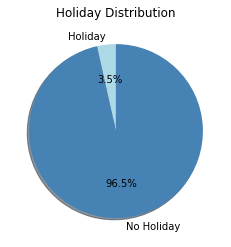

In [ ]:
group = df.groupby("Holiday")
audience = list(df.groupby("Holiday").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])

types = ['Holiday','No Holiday']



colors = ['lightblue','steelblue','darkseagreen','b']
plt.pie(audience,
       labels=types,  
       autopct='%1.1f%%', 
       colors=colors,  
        startangle=90,  
         
        shadow=True  
       )
plt.title("Holiday Distribution")
plt.show()

In [ ]:
df.groupby("Functioning Day").agg({'Rented Bike Count':'sum'})

,Rented Bike Count
Functioning Day,
No,0
Yes,6172314


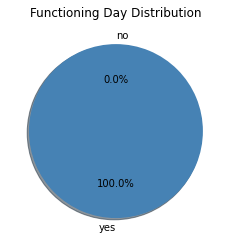

In [ ]:
group = df.groupby("Functioning Day")
audience = list(df.groupby("Functioning Day").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])

types = ['no','yes']


colors = ['lightblue','steelblue','darkseagreen','b']
plt.pie(audience,
       labels=types,  
       autopct='%1.1f%%', 
       colors=colors,  
        startangle=90,  
        #explode = [0,0,0,0.2],  
        shadow=True  
       )
plt.title("Functioning Day Distribution")
plt.show()

In [ ]:
df.groupby("Hour").agg({'Rented Bike Count':'sum'})

,Rented Bike Count
Hour,
0,197633
1,155557
2,110095
3,74216
4,48396
5,50765
6,104961
7,221192
8,370731


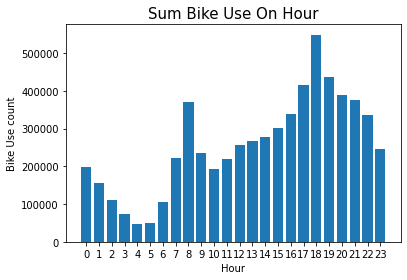

In [ ]:
number=list(df.groupby("Hour").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])
l = list(range(24))
plt.bar(range(len(number)), number, tick_label=l)
plt.title('Sum Bike Use On Hour', fontsize=15)
plt.ylabel('Bike Use count')
plt.xlabel('Hour')
plt.show()

In [ ]:
df.groupby("Humidity(%)").agg({'Rented Bike Count':'sum'})

,Rented Bike Count
Humidity(%),
0,6930
10,1315
11,1986
12,2032
13,4353
...,...
94,13669
95,12146
96,18962


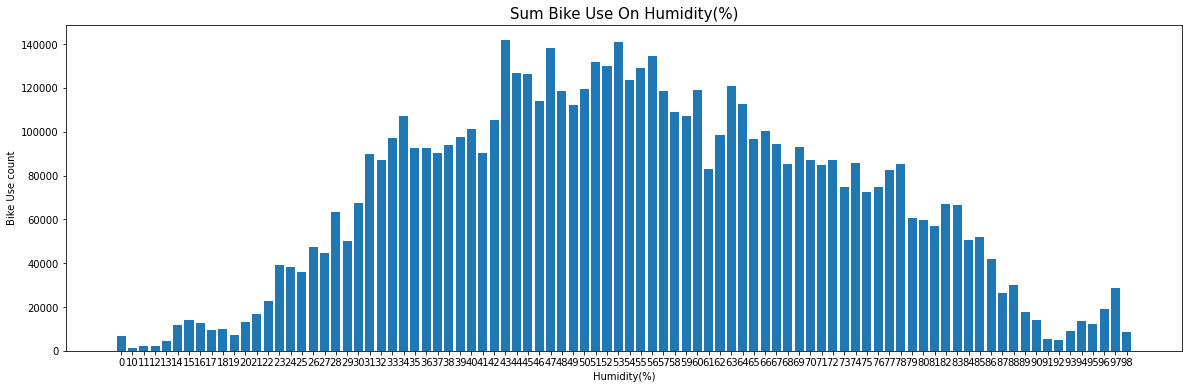

In [ ]:
number=list(df.groupby("Humidity(%)").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])
l = list(df.groupby("Humidity(%)").agg({'Rented Bike Count':'sum'}).index)

plt.figure(figsize=(20, 6))
plt.bar(range(len(number)), number, tick_label=l)
plt.title('Sum Bike Use On Humidity(%)', fontsize=15)
plt.ylabel('Bike Use count')
plt.xlabel('Humidity(%)')
plt.show()

In [ ]:
df.groupby("Temperature(°C)").agg({'Rented Bike Count':'sum'})

,Rented Bike Count
Temperature(°C),
-17.8,322
-17.5,291
-17.4,64
-16.9,36
-16.5,96
...,...
38.0,1184
38.7,475
39.0,1033


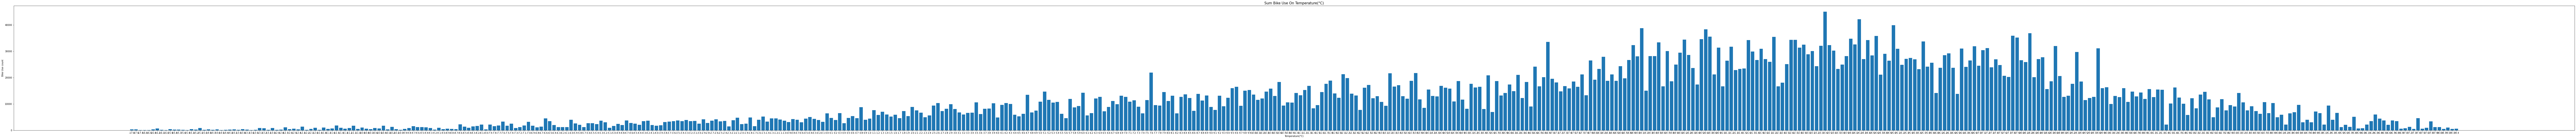

In [ ]:
number=list(df.groupby("Temperature(°C)").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])
l = list(df.groupby("Temperature(°C)").agg({'Rented Bike Count':'sum'}).index)

plt.figure(figsize=(200, 10))
plt.bar(range(len(number)), number, tick_label=l)
plt.title('Sum Bike Use On Temperature(°C)', fontsize=15)
plt.ylabel('Bike Use count')
plt.xlabel('Temperature(°C)')
plt.show()

## Data Preprocessing

In [ ]:
#Change data to datetimes and Extract month and day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
#Create dummy variables for Holiday, Functioning Day and Season

#Set all columns to 0 by default
df_w_dummy = pd.get_dummies(df,columns=['Holiday', 'Functioning Day','Seasons'],prefix=['is','is_Functioning_Day','is'])

In [ ]:
df_w_dummy.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,is_Holiday,is_No Holiday,is_Functioning_Day_No,is_Functioning_Day_Yes,is_Autumn,is_Spring,is_Summer,is_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,1,0,1,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,1,0,1,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1,12,0,1,0,1,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,1,0,1,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1,12,0,1,0,1,0,0,0,1


In [ ]:
#Rearrange and name dataframe as bike
bike = df_w_dummy[['Rented Bike Count','Year','Month','Day','Hour','Temperature(°C)','Dew point temperature(°C)',
                   'Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)',
                   'Snowfall (cm)','is_Holiday','is_Functioning_Day_Yes','is_Winter','is_Spring','is_Summer','is_Autumn']]

In [ ]:
bike.head()

,Rented Bike Count,Year,Month,Day,Hour,Temperature(°C),Dew point temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Holiday,is_Functioning_Day_Yes,is_Winter,is_Spring,is_Summer,is_Autumn
0,254,2017,1,12,0,-5.2,-17.6,37,2.2,2000,0.0,0.0,0.0,0,1,1,0,0,0
1,204,2017,1,12,1,-5.5,-17.6,38,0.8,2000,0.0,0.0,0.0,0,1,1,0,0,0
2,173,2017,1,12,2,-6.0,-17.7,39,1.0,2000,0.0,0.0,0.0,0,1,1,0,0,0
3,107,2017,1,12,3,-6.2,-17.6,40,0.9,2000,0.0,0.0,0.0,0,1,1,0,0,0
4,78,2017,1,12,4,-6.0,-18.6,36,2.3,2000,0.0,0.0,0.0,0,1,1,0,0,0


In [ ]:
bike.corr()

,Rented Bike Count,Year,Month,Day,Hour,Temperature(°C),Dew point temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Holiday,is_Functioning_Day_Yes,is_Winter,is_Spring,is_Summer,is_Autumn
Rented Bike Count,1.000000,0.215162,7.086107e-02,4.684885e-02,4.102573e-01,0.538558,0.379788,-0.199780,0.121108,0.199280,0.261837,-0.123074,-0.141804,-7.233757e-02,0.203943,-4.249251e-01,2.288822e-02,2.965494e-01,1.027530e-01
Year,0.215162,1.000000,-2.955612e-01,-8.341689e-02,0.000000e+00,0.377796,0.336350,0.035925,-0.003781,0.052381,0.128086,0.027522,-0.206418,-1.121635e-01,-0.056873,-5.325406e-01,1.768562e-01,1.768562e-01,1.755711e-01
Month,0.070861,-0.295561,1.000000e+00,1.189318e-02,2.684858e-18,0.049683,0.065101,0.047798,-0.082069,0.077888,-0.030412,-0.022794,0.054758,-9.059045e-03,-0.050807,-1.370569e-01,-2.605971e-01,4.869085e-02,3.492284e-01
Day,0.046849,-0.083417,1.189318e-02,1.000000e+00,1.598551e-19,0.080908,0.069708,0.007047,-0.061234,-0.106859,-0.003446,0.011998,0.101435,1.586655e-02,0.040256,-5.119772e-02,-5.687848e-02,2.059465e-02,8.742449e-02
Hour,0.410257,0.000000,2.684858e-18,1.598551e-19,1.000000e+00,0.124114,0.003054,-0.241644,0.285197,0.098753,0.145131,0.008715,-0.021516,1.691160e-20,0.005439,-1.019481e-19,1.686710e-19,1.686710e-19,2.708568e-19
Temperature(°C),0.538558,0.377796,4.968327e-02,8.090791e-02,1.241145e-01,1.000000,0.912798,0.159371,-0.036252,0.034794,0.353505,0.050282,-0.218405,-5.593084e-02,-0.050170,-7.387196e-01,7.959684e-03,6.658462e-01,5.972825e-02
Dew point temperature(°C),0.379788,0.336350,6.510073e-02,6.970777e-02,3.054372e-03,0.912798,1.000000,0.536894,-0.176486,-0.176630,0.094381,0.125597,-0.150887,-6.675910e-02,-0.052837,-7.223664e-01,2.055888e-03,6.523778e-01,6.287829e-02
Humidity(%),-0.199780,0.035925,4.779778e-02,7.047359e-03,-2.416438e-01,0.159371,0.536894,1.000000,-0.336683,-0.543090,-0.461919,0.236397,0.108183,-5.027765e-02,-0.020800,-2.382952e-01,1.569416e-02,1.925949e-01,2.836650e-02
Wind speed (m/s),0.121108,-0.003781,-8.206909e-02,-6.123440e-02,2.851967e-01,-0.036252,-0.176486,-0.336683,1.000000,0.171507,0.332274,-0.019674,-0.003554,2.301677e-02,0.005037,1.091865e-01,8.385451e-02,-6.469790e-02,-1.280093e-01
Visibility (10m),0.199280,0.052381,7.788783e-02,-1.068595e-01,9.875348e-02,0.034794,-0.176630,-0.543090,0.171507,1.000000,0.149738,-0.167629,-0.121695,3.177281e-02,-0.026000,8.616224e-03,-1.874983e-01,6.195792e-02,1.174133e-01


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

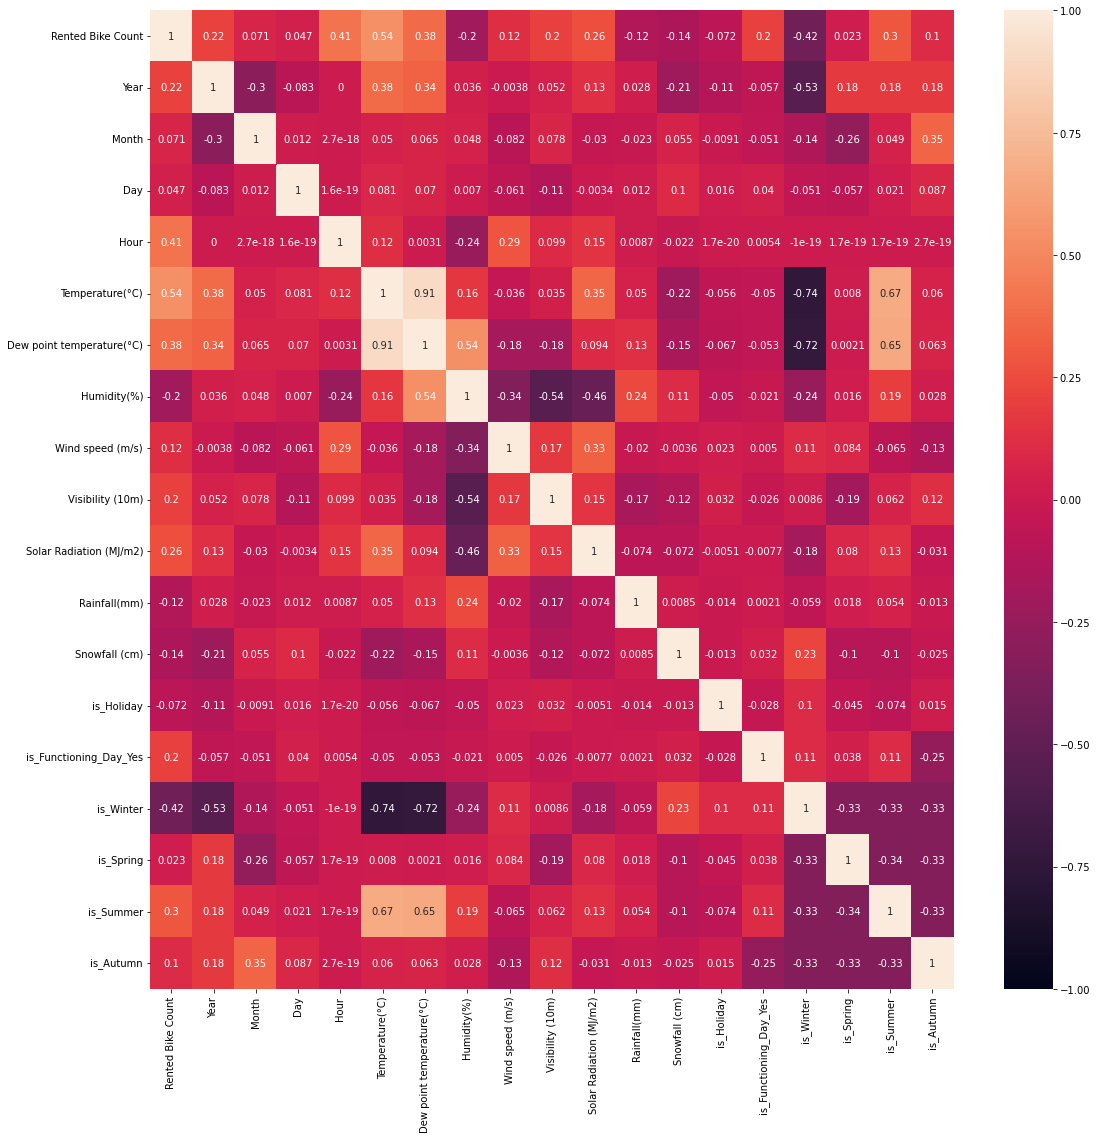

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(bike.corr(),vmin=-1,vmax=1,annot=True)

In [ ]:
bike.dtypes

Rented Bike Count              int64
Year                           int64
Month                          int64
Day                            int64
Hour                           int64
Temperature(°C)              float64
Dew point temperature(°C)    float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
is_Holiday                     uint8
is_Functioning_Day_Yes         uint8
is_Winter                      uint8
is_Spring                      uint8
is_Summer                      uint8
is_Autumn                      uint8
dtype: object

### Random Forest Model for Prediction

In [ ]:
X = bike.drop('Rented Bike Count',axis=1)
y = bike['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
RF_y_comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
RF_y_comparison

,Actual,Predicted
4059,320,233.255
6914,580,477.915
233,226,428.666
982,165,196.190
5967,646,666.645
...,...,...
2909,96,148.886
2244,358,400.647
5121,128,38.862
322,189,315.243


In [ ]:
RF_y_comparison.dtypes

Actual         int64
Predicted    float64
dtype: object

In [ ]:
y_pred = np.round(y_pred)
y_pred

array([233., 478., 429., ...,  39., 315., 460.])

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 136.69025875190258
Mean Squared Error: 50825.15220700152
Root Mean Squared Error: 225.44434392328745
